In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('/creditcard.csv')

In [ ]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [ ]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [23]:
duplicates = data.duplicated()
print(f"Number of duplicate entries: {duplicates.sum()}")

Number of duplicate entries: 3439


In [21]:
data_clean = data.drop_duplicates()

In [ ]:
print(f"Data shape after removing duplicates: {data_clean.shape}")

Data shape after removing duplicates: (283726, 31)


In [22]:
duplicates = data_clean.duplicated()
print(f"Number of duplicate entries: {duplicates.sum()}")

Number of duplicate entries: 0


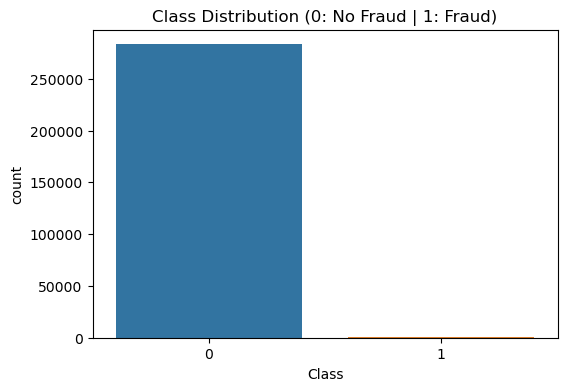

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data_clean)
plt.title('Class Distribution (0: No Fraud | 1: Fraud)')
plt.show()

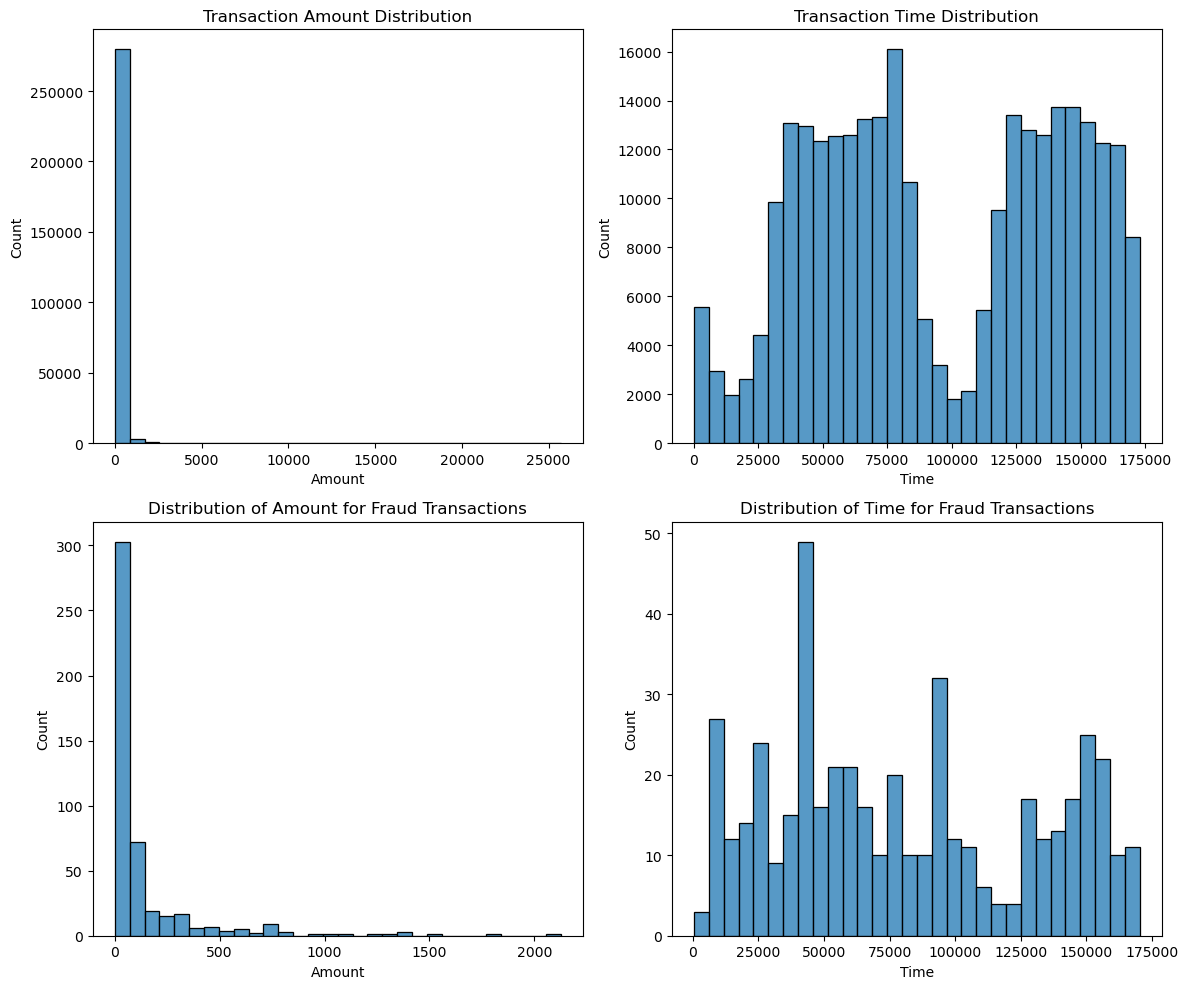

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
sns.histplot(data_clean['Amount'], bins=30, ax=ax[0, 0])
ax[0, 0].set_title('Transaction Amount Distribution')
sns.histplot(data_clean['Time'], bins=30, ax=ax[0, 1])
ax[0, 1].set_title('Transaction Time Distribution')
sns.histplot(data_clean[data_clean['Class'] == 1]['Amount'], bins=30, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Amount for Fraud Transactions')
sns.histplot(data_clean[data_clean['Class'] == 1]['Time'], bins=30, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Time for Fraud Transactions')
plt.tight_layout()

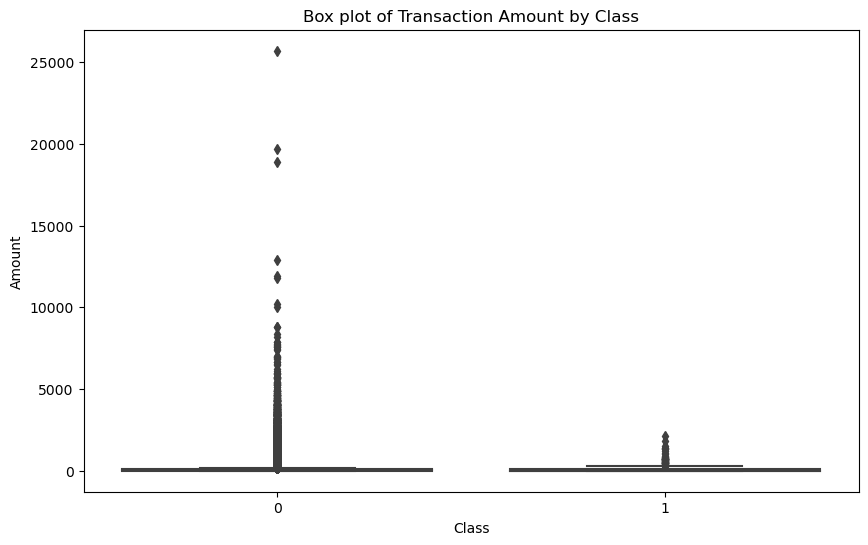

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data_clean)
plt.title('Box plot of Transaction Amount by Class')
plt.show()

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

In [5]:
scaler = MinMaxScaler()
data_clean[['Amount']] = scaler.fit_transform(data_clean[['Amount']])


<ipython-input-5-f43b9c9f541f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['Amount']] = scaler.fit_transform(data_clean[['Amount']])


In [6]:
data=data_clean.drop('Time',axis=1)

In [7]:

# Splitting the data into features and target
X = data.drop('Class', axis=1)
y = data['Class']


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"{name} - Training Data Classification Report:")
    print(classification_report(y_train, y_train_pred))
    print(f"{name} - Testing Data Classification Report:")
    print(classification_report(y_test, y_test_pred))
    print('-' * 60)

/Users/himabindukotha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.88      0.63      0.73       378

    accuracy                           1.00    226980
   macro avg       0.94      0.81      0.87    226980
weighted avg       1.00      1.00      1.00    226980

Logistic Regression - Testing Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.86      0.59      0.70        95

    accuracy                           1.00     56746
   macro avg       0.93      0.79      0.85     56746
weighted avg       1.00      1.00      1.00     56746

------------------------------------------------------------
Decision Tree - Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
      

In [9]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline

In [11]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [12]:
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_train_pred = model.predict(X_train_smote)
    y_test_pred = model.predict(X_test_smote)

    print(f"{name} - Training Data Classification Report:")
    print(classification_report(y_train_smote, y_train_pred))
    print(f"{name} - Testing Data Classification Report:")
    print(classification_report(y_test_smote, y_test_pred))
    print('-' * 60)

Logistic Regression - Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94    226790
           1       0.97      0.91      0.94    226414

    accuracy                           0.94    453204
   macro avg       0.94      0.94      0.94    453204
weighted avg       0.94      0.94      0.94    453204

Logistic Regression - Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     56463
           1       0.97      0.91      0.94     56839

    accuracy                           0.94    113302
   macro avg       0.94      0.94      0.94    113302
weighted avg       0.94      0.94      0.94    113302

------------------------------------------------------------
Decision Tree - Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226790
      

In [14]:
import numpy as np


In [8]:
data = pd.read_csv('/creditcard.csv')
data = data.drop_duplicates()

# Scaling 'Amount' and 'Time' as they are not in the range [0,1]
scaler = MinMaxScaler()
data[['Amount', 'Time']] = scaler.fit_transform(data[['Amount', 'Time']])

# Create 'Hour of Transaction' from 'Time'
# Assuming 'Time' is in seconds, we convert it to hours and then take modulo 24
data['Hour_of_Transaction'] = (data['Time'] * 24 * 3600 // 3600) % 24

# Categorize 'Amount' into 'Small', 'Medium', 'High' bins
# Define the bins based on quantiles
amount_bins = pd.qcut(data['Amount'], q=[0, 0.33, 0.66, 1], labels=["Small", "Medium", "High"])
data['Amount_Bin'] = amount_bins

# View the updated DataFrame to check the new feature
print(data[['Time', 'Amount', 'Hour_of_Transaction', 'Amount_Bin']].head())

       Time    Amount  Hour_of_Transaction Amount_Bin
0  0.000000  0.005824                  0.0       High
1  0.000000  0.000105                  0.0      Small
2  0.000006  0.014739                  0.0       High
3  0.000006  0.004807                  0.0       High
4  0.000012  0.002724                  0.0       High


<ipython-input-8-4cc932e07152>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Amount', 'Time']] = scaler.fit_transform(data[['Amount', 'Time']])
<ipython-input-8-4cc932e07152>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hour_of_Transaction'] = (data['Time'] * 24 * 3600 // 3600) % 24
<ipython-input-8-4cc932e07152>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [9]:
data=data.drop('Time',axis=1)
data=data.drop('Amount',axis=1)

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [11]:
column_transformer = ColumnTransformer(
    [('encoder', OneHotEncoder(), ['Amount_Bin'])],
    remainder='passthrough'
)


In [12]:
X = data.drop(['Class'], axis=1)
y = data['Class']

In [13]:
from sklearn.pipeline import Pipeline

In [14]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for transformations and model fitting
pipeline_dt = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_rf = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit and evaluate the Decision Tree model
pipeline_dt.fit(X_train, y_train)
y_train_pred_dt = pipeline_dt.predict(X_train)
y_test_pred_dt = pipeline_dt.predict(X_test)
print("Decision Tree Training Data Classification Report:")
print(classification_report(y_train, y_train_pred_dt))
print("Decision Tree Testing Data Classification Report:")
print(classification_report(y_test, y_test_pred_dt))

# Fit and evaluate the Random Forest model
pipeline_rf.fit(X_train, y_train)
y_train_pred_rf = pipeline_rf.predict(X_train)
y_test_pred_rf = pipeline_rf.predict(X_test)
print("Random Forest Training Data Classification Report:")
print(classification_report(y_train, y_train_pred_rf))
print("Random Forest Testing Data Classification Report:")
print(classification_report(y_test, y_test_pred_rf))

Decision Tree Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       1.00      1.00      1.00       383

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980

Decision Tree Testing Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.69      0.71      0.70        90

    accuracy                           1.00     56746
   macro avg       0.84      0.86      0.85     56746
weighted avg       1.00      1.00      1.00     56746

Random Forest Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       1.00      1.00      1.00       383

    accuracy                  

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

In [18]:
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
print("Random Forest Confusion Matrix:")
print(cm_rf)

Random Forest Confusion Matrix:
[[56655     1]
 [   26    64]]


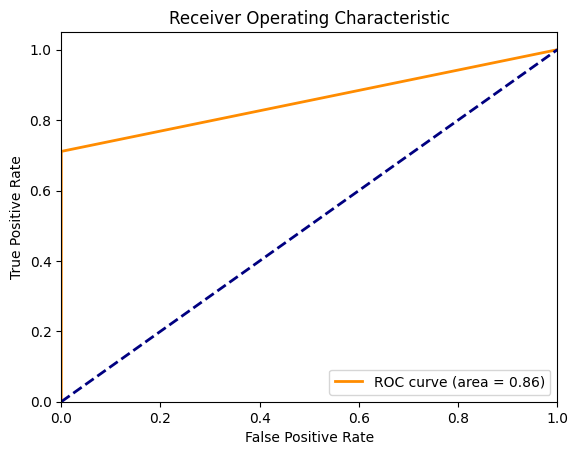

In [19]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_test_pred_rf)
roc_auc = auc(fpr, tpr)

# Generate ROC plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV

In [29]:
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a pipeline with a RandomForestClassifier
pipeline_rf = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Randomized search for hyperparameter tuning
rf_random_search = RandomizedSearchCV(
    pipeline_rf,
    param_distributions=rf_param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=3,       # Number of folds in cross-validation
    verbose=2,  # Controls the verbosity: the higher, the more messages
    n_jobs=-1,  # Number of jobs to run in parallel
    scoring='recall'  # You can change this according to the business objective
)

# Fit the RandomizedSearchCV object to the training data
rf_random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Random Forest Parameters:", rf_random_search.best_params_)

# Evaluate the best model found by RandomizedSearchCV on the training set
print("Random Forest Training Data Classification Report:")
print(classification_report(y_train, rf_random_search.predict(X_train)))

# Evaluate the best model found by RandomizedSearchCV on the test set
print("Random Forest Testing Data Classification Report:")
print(classification_report(y_test, rf_random_search.predict(X_test)))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Random Forest Parameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 20}
Random Forest Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       1.00      0.96      0.98       383

    accuracy                           1.00    226980
   macro avg       1.00      0.98      0.99    226980
weighted avg       1.00      1.00      1.00    226980

Random Forest Testing Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.96      0.73      0.83        90

    accuracy                           1.00     56746
   macro avg       0.98      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746



SMOTE FOR FEATURE ENGINEERING

In [28]:
X = data.drop(['Class'], axis=1)
y = data['Class']

# Setup the column transformer with OneHotEncoder
column_transformer = ColumnTransformer(
    [('encoder', OneHotEncoder(), ['Amount_Bin'])],
    remainder='passthrough'
)

# Transform the dataset
X_encoded = column_transformer.fit_transform(X)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train and evaluate the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_train_pred_dt = dt_classifier.predict(X_train)
y_test_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Training Data Classification Report:")
print(classification_report(y_train, y_train_pred_dt))
print("Decision Tree Testing Data Classification Report:")
print(classification_report(y_test, y_test_pred_dt))

# Train and evaluate the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_train_pred_rf = rf_classifier.predict(X_train)
y_test_pred_rf = rf_classifier.predict(X_test)
print("Random Forest Training Data Classification Report:")
print(classification_report(y_train, y_train_pred_rf))
print("Random Forest Testing Data Classification Report:")
print(classification_report(y_test, y_test_pred_rf))

Decision Tree Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226790
           1       1.00      1.00      1.00    226414

    accuracy                           1.00    453204
   macro avg       1.00      1.00      1.00    453204
weighted avg       1.00      1.00      1.00    453204

Decision Tree Testing Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

Random Forest Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226790
           1       1.00      1.00      1.00    226414

    accuracy                  

HYPER PARAMETER TUNING FOR ABOVE MODEL(FEATURE ENGINEERING SMOTE)

In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline

# Load and prepare the data
data = pd.read_csv('/creditcard.csv')
data = data.drop_duplicates()
scaler = MinMaxScaler()
data[['Amount', 'Time']] = scaler.fit_transform(data[['Amount', 'Time']])
data['Hour_of_Transaction'] = (data['Time'] * 24 * 3600 // 3600) % 24
amount_bins = pd.qcut(data['Amount'], q=[0, 0.33, 0.66, 1], labels=["Small", "Medium", "High"])
data['Amount_Bin'] = amount_bins

# One-hot encoding
column_transformer = ColumnTransformer(
    [('encoder', OneHotEncoder(), ['Amount_Bin'])],
    remainder='passthrough'
)

X = data.drop(['Class'], axis=1)
y = data['Class']

pipeline = IMBPipeline([
    ('preprocessor', column_transformer),
    ('smote', SMOTE(random_state=42))
])

X_processed, y_processed = pipeline.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)

# Random Forest hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200],  # Reduced the number of estimators
    'max_depth': [None, 10],     # Fewer options for depth
    'min_samples_split': [2, 5], # Reduced options
    'min_samples_leaf': [1, 2]   # Simplified
}

# Randomized search for Random Forest
rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, n_iter=10, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
rf_random_search.fit(X_train, y_train)
print("Best Random Forest Parameters:", rf_random_search.best_params_)
print("Random Forest Training Data Classification Report:")
print(classification_report(y_train, rf_random_search.predict(X_train)))
print("Random Forest Testing Data Classification Report:")
print(classification_report(y_test, rf_random_search.predict(X_test)))


<ipython-input-31-7180dad39ef3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Amount', 'Time']] = scaler.fit_transform(data[['Amount', 'Time']])


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Random Forest Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226790
           1       1.00      1.00      1.00    226414

    accuracy                           1.00    453204
   macro avg       1.00      1.00      1.00    453204
weighted avg       1.00      1.00      1.00    453204

Random Forest Testing Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



We are not considering the feature Engineering SMOTE tecnique due to its perfect classification as it doesn't not work in real time situations.